<a href="https://colab.research.google.com/github/AnaClaraAmorim/AlgoritmosAvancados/blob/main/CompressaoSvd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decomposição SVD com aplicação para compressão de imagem**



### Decomposição SVD 

A decomposição SVD (decomposição em valores singulares) ou singular value decomposition (SVD) é a fatoração de uma matriz, com diversas aplicações importantes em processamento de sinais e estatística.

Formalmente, a decomposição em valores singulares de uma matriz m×n A é uma fatoração ou fatorização na forma:

> *A = UΣV* 


Onde U é uma matriz ortogonal m×m, Σ é uma matriz retangular diagonal m×n com números reais não-negativos na diagonal, e V* (é a transposta de V) é uma matriz ortogonal n×n real ou complexa. As entradas diagonais σi,i de Σ são os chamados valores singulares de A. 

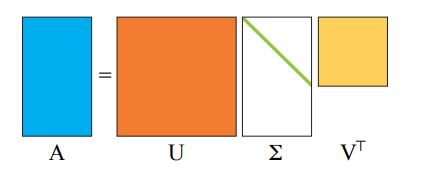








### **Aplicação de SVD - compressão de imagem**

Entrada: uma imagem I de m × n pixels (grayscale)

1.   representar I como A ∈ M(m, n), 0 ≤ aij ≤ 1;
2.   compressao via SVD: trocar A por Ak
3.   Ak possui apenas os k primeiros valores singulares de A
4.   armazenamos k(m + n + 1) numeros ao invés de mn.









In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import math as math
from scipy.linalg import sqrtm
import scipy.linalg

drive.mount('/content/drive') #acesso ao drive


Mounted at /content/drive


In [2]:
#se a imagem não for em grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

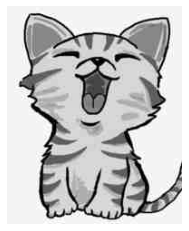

In [4]:
#Imagem menor para ser usada no metodo calculado de decomposição SVD Francis
A = plt.imread('/content/drive/MyDrive/Colab Notebooks/Capturar_Easy-Resize.com.jpg')
A = rgb2gray(A) #descomentar se a imagem não for grayscale   
A = im2double(A)

figure = plt.imshow(A, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
figure.axes.set_axis_off()

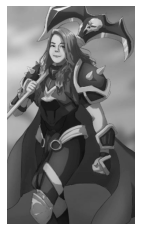

In [5]:
#imagem para ser usada no metodo de decomposição SVD com a biblioteca do python
B = plt.imread('/content/drive/MyDrive/Colab Notebooks/Clara.JPG')
B = rgb2gray(B) #descomentar se a imagem não for grayscale   
B = im2double(B)

figure = plt.imshow(B, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
figure.axes.set_axis_off()

In [6]:
# QR modificado
def mgsQR(A):
    (m,n) = np.shape(A);
    V = np.copy(A); 
    Q = np.zeros((m,n));
    R = np.zeros((n,n));

    for j in np.arange(n):
        for i in np.arange(j):
            R[i,j] = Q[:,i].dot(V[:,j]); 
            V[:,j] = V[:,j] - R[i,j]*Q[:,i];
        R[j,j] = np.linalg.norm(V[:,j]);
        Q[:,j] = V[:,j]/R[j,j];

    return Q,R

In [7]:
def francis(A,tol):
    n = np.shape(A)[0];
    A_local = np.copy(A);
    V = np.eye(n);
    erro = np.inf

    while erro > tol:
        [Q,R] = scipy.linalg.qr(A_local);
        A_local = R@Q;
        V = V@Q;

        erro = np.max(np.max(np.abs(np.tril(A_local,-1))));
    
    D = np.diag(A_local);

    return V,D

In [8]:
def mySvd(A):
  tol = 1e-5;
  (m,n) = np.shape(A);
  k = min(m,n);
  S = np.zeros((m,n));
  U,_= francis(A@A.T, tol)
  V,D = francis(A.T@A, tol)
  S[0:k,0:k] = np.diag(np.sqrt(D))
  

  return U,S,V

In [9]:
def compresao():
  j = 0
  for k in (10,50,100):
    Ak = U[:,:k] @ S[0:k,:k] @ V[:k,:]
    plt.figure(j+1)
    j +=1
    figure = plt.imshow(Ak, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title('k ='+ str(k))
    figure.axes.set_axis_off()
    

  plt.savefig("/content/drive/MyDrive/Colab Notebooks/maca.jpeg") #caso queira salvar a figura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Compresao com SVD calculado pelo metodo de Francis:


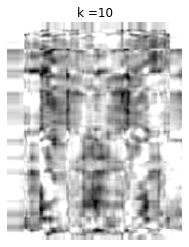

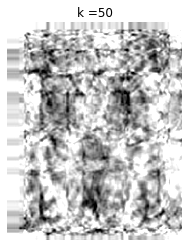

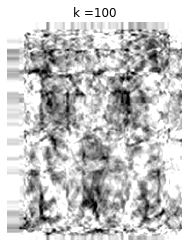

In [10]:
#SVD usando o metodo de francis
U,S,V = mySvd(A)
V = -V.T
print("Compresao com SVD calculado pelo metodo de Francis:")
compresao()

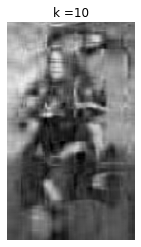

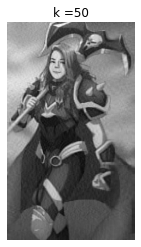

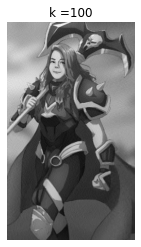

In [11]:
#SVD DO Python
U,S,V = np.linalg.svd(B, full_matrices=False)
S = np.diag(S) 
compresao()

Ao usar o metódo de decomposição SVD direto da biblioteca do python a compresão da imagem fica bem melhor, fora o fato de o algoritmo rodar bem mais rápido mesmo para imagens grandes.

Como é notável quanto menor o K menor a resolução das imagens, mas também menor é a memória ocupada pela imagem.